# Online Games Analysis for 2017

The goal of this project is to analyze historical data in game sales to identify the patterns that determine whether a game can be said to be successful or not.

In [1]:
import pandas as pd
import numpy as np 
from math import factorial
from scipy import stats as st

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
try:
    df_games = pd.read_csv("/datasets/games.csv")
except FileNotFoundError:
    df_games = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

displayed the top info of the dataset

In [3]:
display(df_games.head())
display(df_games.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

From the first look at the dataset there are some missing values that will be filled in.

Columns have been changed to lowercase letters and the types have been formatted to their proper places in the cell below.

In [4]:
df_games.columns = df_games.columns.str.lower()

df_games = df_games.loc[(df_games['year_of_release'] != None) & (df_games['year_of_release'] >= 2000)].reset_index(drop=True)

df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = None

df_games['user_score'] = df_games['user_score'].astype('float64')*10

df_games.loc[df_games['rating'] == 'EC', 'rating'] = 'E'
df_games.loc[df_games['rating'] == 'K-A', 'rating'] = 'M'
df_games.loc[df_games['rating'] == 'AO', 'rating'] = 'M'
df_games.loc[df_games['rating'] == 'RP', 'rating'] = 'E10+'

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [5]:
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

In [6]:
display(df_games.info())
display(df_games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     7887 non-null   float64
 9   user_score       7371 non-null   float64
 10  rating           9663 non-null   object 
 11  total_sales      14470 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.3+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91


In [7]:
df_games['rating'] = df_games['rating'].fillna('Unknown')

df_games.dropna(subset=['name', 'genre'], inplace=True)
                                               

Filled in missing value for 'rating' with Unknown.

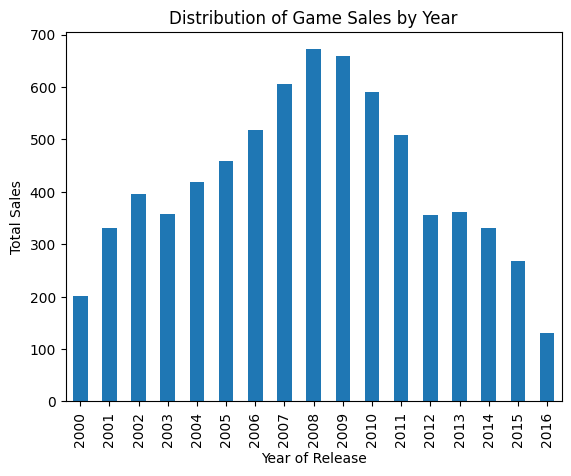

In [8]:
yearly_sales = df_games.groupby('year_of_release')['total_sales'].sum()

yearly_sales.plot(kind='bar')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.title('Distribution of Game Sales by Year')
plt.show()

From what this bar graph above shows is that from the year 2000 the sales have gone up to its highest in 2008 and then started decreasing to the year 2016.

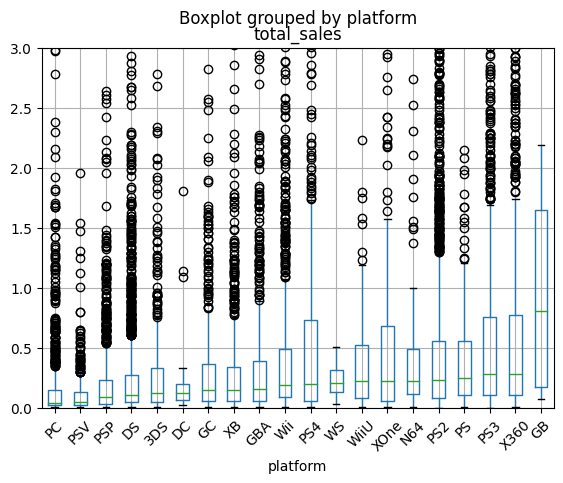

In [9]:
platform_medians = df_games.groupby('platform')['total_sales'].median().sort_values()

df_games['platform'] = pd.Categorical(df_games['platform'], categories=platform_medians.index, ordered=True)

df_games.boxplot(column='total_sales', by='platform')
plt.xticks(rotation=45)
plt.ylim(0, 3)
plt.show()

Based on this boxplot above, the platform that had the most global sales of games was Gameboy and the platform with the least is PS5.

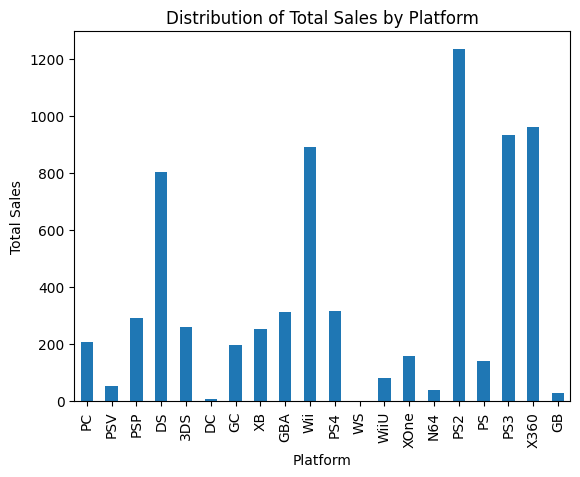

In [10]:
platform_sales = df_games.groupby('platform')['total_sales'].sum()

platform_sales.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Distribution of Total Sales by Platform')
plt.show()

On the graph above it shows that PS2 had the most total sales and the least with no sales at all is a handheld game console called WonderSwan.

In [11]:
df_games = df_games[(df_games['year_of_release'] >= 2013)]

df_lifespan = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])
df_lifespan['lifespan'] = df_lifespan['max'] - df_lifespan['min'] + 1

average_lifespan = df_lifespan['lifespan'].mean()

print(average_lifespan)

3.6363636363636362


In the cell above we have the lifespan of each platform since the year 2013.

In [12]:
correlation_user = df_games['user_score'].corr(df_games['total_sales'])
correlation_critic = df_games['critic_score'].corr(df_games['total_sales'])

print("Correlation between user score and total sales:", correlation_user)
print("Correlation between critic score and total sales:", correlation_critic)

Correlation between user score and total sales: -0.002607813354598264
Correlation between critic score and total sales: 0.3136995151027369


In [13]:
ps4_games = df_games[df_games['platform'] == 'PS4']
print(ps4_games[['total_sales', 'user_score', 'critic_score']].corr())

              total_sales  user_score  critic_score
total_sales      1.000000   -0.031957      0.406568
user_score      -0.031957    1.000000      0.557654
critic_score     0.406568    0.557654      1.000000


Above cell contains the calculated correlation with total sales with user score and critic score.

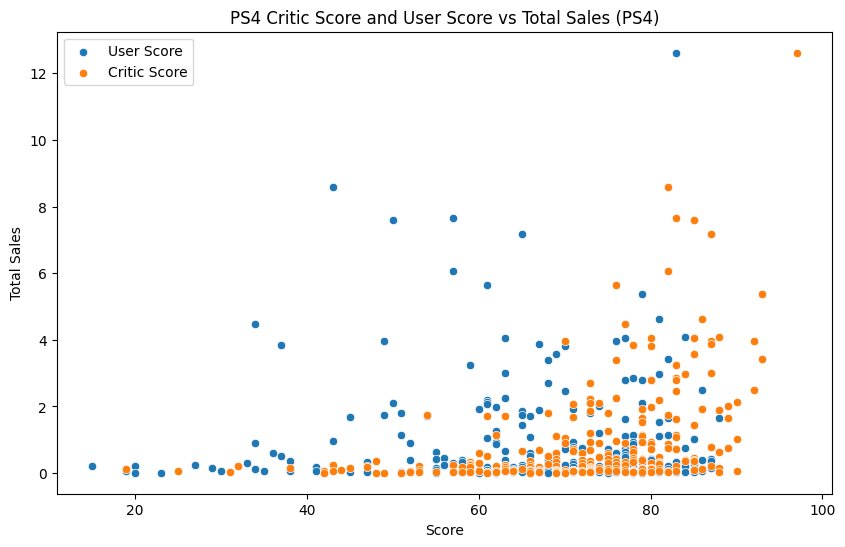

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales', label='User Score')

sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales', label='Critic Score')
plt.title('PS4 Critic Score and User Score vs Total Sales (PS4)')
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

The above scatterplot shows the correlation between critic score and user score with total sales.

In [15]:
genre_analysis = df_games.groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
print(genre_analysis)

           genre  total_sales
0         Action       321.87
1        Shooter       232.98
2         Sports       150.65
3   Role-Playing       145.89
4           Misc        62.82
5       Platform        42.63
6         Racing        39.89
7       Fighting        35.31
8      Adventure        23.64
9     Simulation        21.76
10      Strategy        10.08
11        Puzzle         3.17


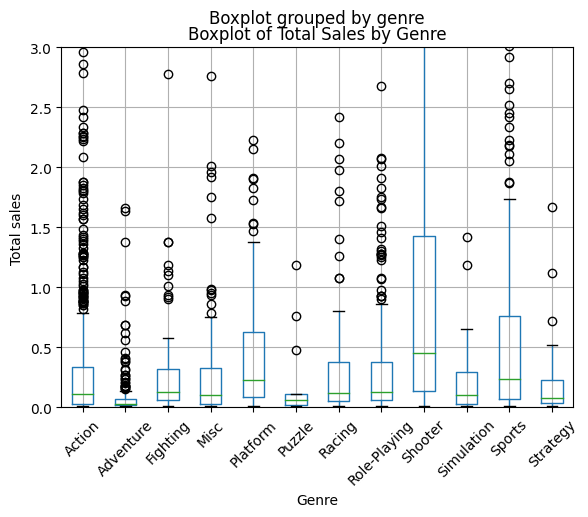

In [16]:
df_games.boxplot(column='total_sales', by='genre')
plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.title('Boxplot of Total Sales by Genre')
plt.xticks(rotation=45)
plt.ylim(0, 3)
plt.show()

Based on this analysis, the shooter genre is the highest in total sales with platform genre right under it and the lowest genre in total sales is adventure.

In [17]:
def get_top_5_platforms(df_games, region_column):
    return df_games.groupby('platform')[region_column].sum().nlargest(5).index.tolist()

top_na_platforms = get_top_5_platforms(df_games, 'na_sales')
top_jp_platforms = get_top_5_platforms(df_games, 'jp_sales')
top_eu_platforms = get_top_5_platforms(df_games, 'eu_sales')

print("Top 5 platforms for NA Sales:", top_na_platforms)
print("Top 5 platforms for JP Sales:", top_jp_platforms)
print("Top 5 platforms for EU Sales:", top_eu_platforms)

Top 5 platforms for NA Sales: ['PS4', 'XOne', 'X360', 'PS3', '3DS']
Top 5 platforms for JP Sales: ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']
Top 5 platforms for EU Sales: ['PS4', 'PS3', 'XOne', 'X360', '3DS']


This analysis shows that the top 5 platforms in North America are X360, PS2, Wii, PS3, and DS.
The top 5 platforms for Japan sales are DS, PS2, 3DS, PS3, and PSP.
The top 5 platforms for Europe sales are PS2, PS3, X360, Wii, and DS.

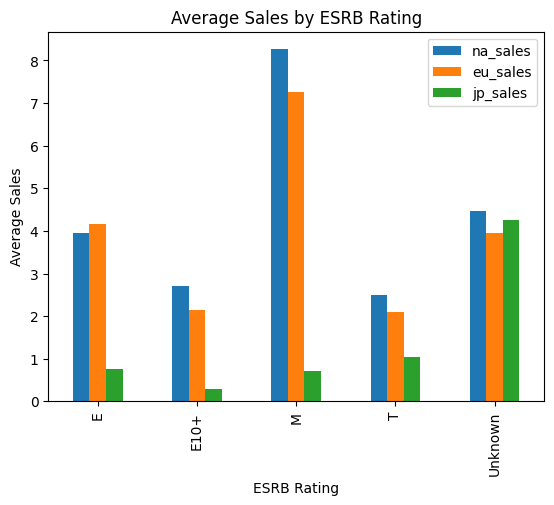

In [18]:
grouped_data = df_games.groupby(['rating', 'platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum()

average_sales = grouped_data.groupby('rating').mean()

average_sales.plot(kind='bar')
plt.xlabel('ESRB Rating')
plt.ylabel('Average Sales')
plt.title('Average Sales by ESRB Rating')
plt.show()

na_sales_by_rating = grouped_data['na_sales'].groupby('rating').mean()
eu_sales_by_rating = grouped_data['eu_sales'].groupby('rating').mean()
jp_sales_by_rating = grouped_data['jp_sales'].groupby('rating').mean()


The grouped data chart above shows that the games that are rated "E" have the most sales with "M" at second and "T" at third and that leaves "E10+" at last.

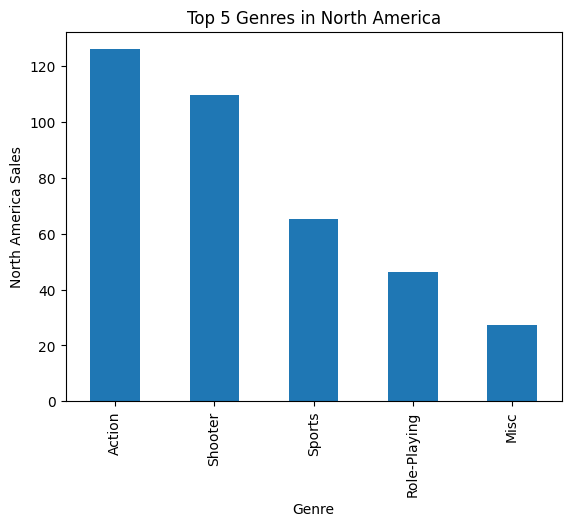

In [19]:
genre_sales = df_games.groupby('genre')['na_sales'].sum()

top_5_genres = genre_sales.sort_values(ascending=False).head(5)

top_5_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('North America Sales')
plt.title('Top 5 Genres in North America')
plt.show()

In the cell above these are the top 5 genres for North America with Action leading at the top and Role-playing at the bottom.

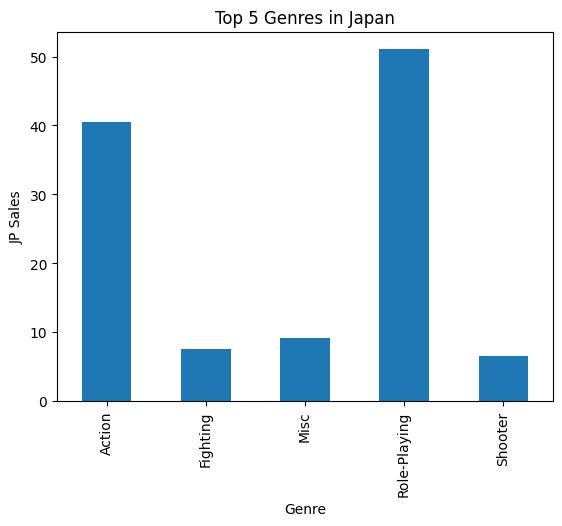

In [20]:
top_5_genres = df_games.groupby('genre')['jp_sales'].sum().nlargest(5).index

df_top_5 = df_games[df_games['genre'].isin(top_5_genres)]

genre_jp_sales = df_top_5.groupby('genre')['jp_sales'].sum()

genre_jp_sales.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('JP Sales')
plt.title('Top 5 Genres in Japan')
plt.show()

In the cell above these are the top 5 genres for Japan with Role-playing at the top and platform at the bottom.

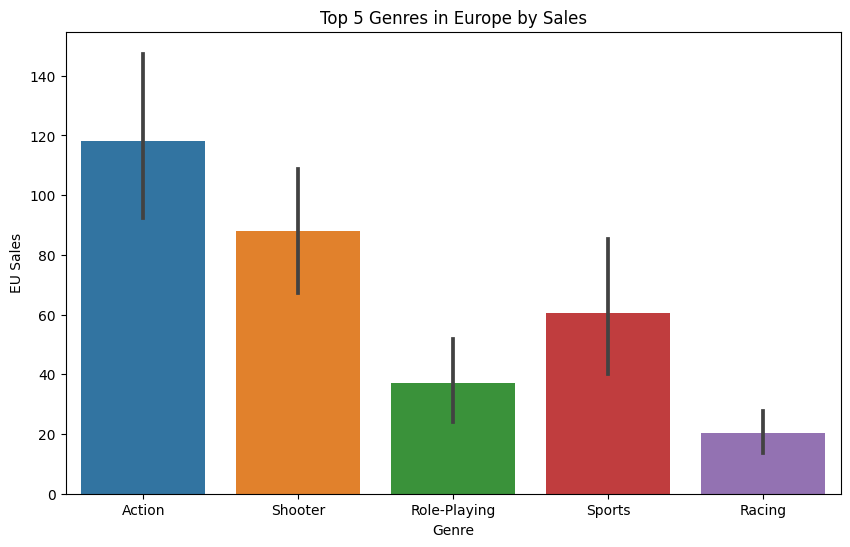

In [21]:
top_5_genres = df_games.groupby('genre')['eu_sales'].sum().nlargest(5).index

df_top_5 = df_games[df_games['genre'].isin(top_5_genres)]

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='eu_sales', data=df_top_5, estimator=sum)
plt.title('Top 5 Genres in Europe by Sales')
plt.xlabel('Genre')
plt.ylabel('EU Sales')
plt.show()

In the cell above these are the top 5 genres for Europe with Action leading at the top and Racing just below Misc to be last.

In [22]:
xone_user_ratings = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
pc_user_ratings = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

print('XBox One user ratings variance:', np.var(xone_user_ratings).round(2))
print('PC user ratings variance:', np.var(pc_user_ratings).round(2))

XBox One user ratings variance: 189.65
PC user ratings variance: 301.63


A commonly used significance level is 0.05 (5%), which means you are willing to accept a 5% chance of incorrectly rejecting the null hypothesis.

In [23]:
alpha = 0.05
results_1 = st.ttest_ind(xone_user_ratings, pc_user_ratings, equal_var=False, nan_policy='omit')

print('p-value:',results_1.pvalue) 

if results_1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.1475959401343053
We can't reject the null hypothesis


The null hypothesis cannot be rejected in this test so the average user ratings on xbox one and PC are the same.

In [24]:
action_user_ratings = df_games[df_games['genre'] == 'Action']['user_score']
sports_user_ratings = df_games[df_games['genre'] == 'Sports']['user_score']

print('User ratings of Action genre variance:', np.var(action_user_ratings).round(2))
print('User ratings of Sports genre variance:', np.var(sports_user_ratings).round(2))

User ratings of Action genre variance: 176.48
User ratings of Sports genre variance: 316.07


A commonly used significance level is 0.05 (5%), which means you are willing to accept a 5% chance of incorrectly rejecting the null hypothesis.

In [25]:
alpha = 0.05
results_2 = st.ttest_ind(action_user_ratings, sports_user_ratings, equal_var=False, nan_policy='omit')

print('p-value:',results_2.pvalue) 

if results_2.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.4460039700704734e-20
We reject the null hypothesis


The null hypothesis is rejected in this test so the average user ratings of the action and sports are not equal.

CONCLUSION:

North America generates the most revenue compared to other region.

The platform that had the most global sales of games was GameBoy and the platform with the least is PS5.

PS2 had the most total sales and the least with no sales at all is a handheld game console called WonderSwan.

The sports genre is the highest in total sales with racing genre right under it and the lowest genre in total sales is strategy.

The top 5 platforms in North America are X360, PS2, Wii, PS3, and DS. The top 5 platforms for Japan sales are DS, PS2, 3DS, PS3, and PSP. The top 5 platforms for Europe sales are PS2, PS3, X360, Wii, and DS.

The games that are rated "M" have the most sales with "Unknown" at second and "E" at third and that leaves "E10+" at last.

THERE WERE TWO HYPOTHESIS TESTED:

The null hypothesis cannot be rejected in this test so the average user ratings on xbox one and PC are the same.

The null hypothesis is rejected in this test so the average user ratings of the action and sports are not equal.
